In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('heights.csv')
df.sample(5)

,gender,height
7581,Female,65.655525
4192,Male,72.866673
8136,Female,65.604100
6515,Female,67.978020
97,Male,66.832878


## Histogram for visualizing height

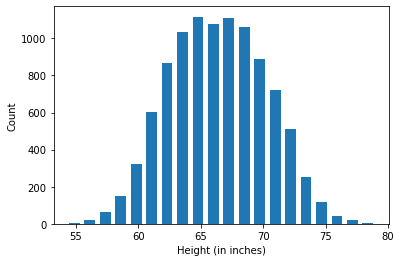

In [7]:
plt.hist(df.height, bins=20, rwidth=0.7)
plt.xlabel('Height (in inches)')
plt.ylabel('Count')
plt.show()

#### Above we can see that graph is forming a Bell Curve

In [8]:
df.describe()

,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


In [9]:
df.shape

(10000, 2)

## Plotting Bell Curve

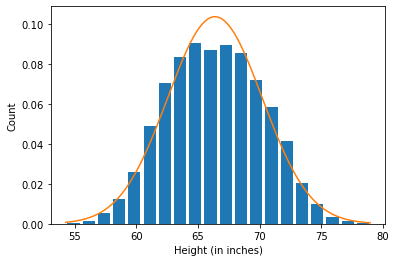

In [22]:
from scipy.stats import norm

plt.hist(df.height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (in inches)')
plt.ylabel('Count')

rng = np.arange(df.height.min(), df.height.max(), 0.1)
# pdf is probability density function
plt.plot(rng, norm.pdf(rng, df.height.mean(), df.height.std()))

In [24]:
df.height.mean()

66.3675597548656

## Upper limit and Lower limit

In [25]:
upper_limit = df.height.mean() + 3*df.height.std()
upper_limit

77.91014411725232

In [69]:
max_threshold = df.height.quantile(0.99957)
max_threshold

77.93149906388533

In [26]:
lower_limit = df.height.mean() - 3*df.height.std()
lower_limit

54.824975392478876

In [27]:
df[(df.height > upper_limit) | (df.height < lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [30]:
df2 = df[(df.height < upper_limit) & (df.height > lower_limit)]
df2

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [31]:
df2.shape

(9993, 2)

In [32]:
df.shape[0] - df2.shape[0]

7

### Above we can see that we have removed 7 outliers


## Outlier detection and removal using Z Score

### Z score indicates how many standard deviation away a data point is.

For example in our case mean is 66.37 and standard deviation is 3.84.

If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

Calculate Z-Score
<br/><img src="https://i.imgur.com/3TuDF4G.jpg" style="height:30vh;" align="left">

In [35]:
df['z-score'] = (df['height']-df['height'].mean())/df['height'].std()
df.head()

,gender,height,z-score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [37]:
(73.847017-66.37)/3.84
# First record z score

1.9471398437499974

### Checking outliers

In [38]:
df[df['z-score'] > 3]

,gender,height,z-score
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [41]:
df[df['z-score'] < -3]

,gender,height,z-score
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [42]:
df[(df['z-score'] > 3) | (df['z-score'] < -3)]

,gender,height,z-score
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [45]:
df2 = df[(df['z-score'] < 3) & (df['z-score'] > -3)]
df2

,gender,height,z-score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [46]:
df2.shape

(9993, 3)

In [47]:
df.shape

(10000, 3)

In [48]:
df.shape[0] - df2.shape[0]

7